In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import statsmodels.formula.api as smf 
from stargazer.stargazer import Stargazer


In [2]:
df = pd.read_csv("data/df_final.csv")
df.head()

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen


# 5. Wie hoch war der durchschnittliche Umsatz pro Bundesland?

Wir filtern als Erstes nach den Reihen, die einen Preis > 0 haben. 

In [3]:
df_umsatz = df[df["Preis"] > 0]
df_umsatz

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1.0,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1.0,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1.0,36.0,K1096,Baden-Württemberg


Filtern nach Umsatz und Niederlassung

In [4]:
df_umsatz = df_umsatz[["Preis" , "Niederlassung"]]
df_umsatz

,Preis,Niederlassung
0,88160.31,Bayern
1,103145.70,Berlin
2,80565.16,Baden-Württemberg
3,83949.89,Bayern
4,93781.58,Hessen
...,...,...
1099,103751.58,Thüringen
1100,64230.98,Niedersachsen
1101,103123.57,Berlin
1102,49215.87,Baden-Württemberg


Jetzt berechnen wir den durchschnittlichen Umsatz pro Bundesland indem wir zuerst gruppieren (groupby function) und dann für jede Gruppe den Durchschnitt berechnen (mean function)

In [5]:
avg_umsatz = df_umsatz.groupby("Niederlassung")["Preis"].mean().round(2).reset_index().sort_values(by = "Preis") 
avg_umsatz

,Niederlassung,Preis
4,Hamburg,85549.50
5,Hessen,85864.93
3,Brandenburg,86673.64
6,Niedersachsen,87963.31
7,Nordrhein-Westfalen,88633.27
1,Bayern,89344.31
8,Sachsen,89455.08
2,Berlin,89584.98
9,Thüringen,90816.99
0,Baden-Württemberg,90969.56


Balkendiagramm zur besseren Verdeutlichung der Umsätze pro Bundesland

In [6]:
figure = px.bar(avg_umsatz,
       x =  "Preis", 
       y = "Niederlassung",
       title = "Durchschnittlicher Umsatz pro Bundesland",
       color = "Niederlassung",)
figure.update_layout(width = 1200,
                     height = 400)
figure

# 10. Wie hoch ist das Durchschnittseinkommen unserer Kunden ? 

In [7]:
df_kunden = df[df["Preis"] > 0]
df_kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1.0,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1.0,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1.0,36.0,K1096,Baden-Württemberg


In [8]:
avg_einkommen_kunden = df_kunden["Einkommen"].mean().round(2)
avg_einkommen_kunden

58898.53

# 11. Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit? (nur für die Kunden) 

In [9]:
df_kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1.0,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1.0,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1.0,36.0,K1096,Baden-Württemberg


Variablen von Interesse auswählen und separat in einem Dataframe speichern. 

In [10]:
df_corr_variables = df_kunden[["Alter" , "Einkommen" , "Preis" , "Zeit"]]
df_corr_variables


,Alter,Einkommen,Preis,Zeit
0,64,66894.0,88160.31,43.0
1,54,77644.0,103145.70,40.0
2,55,44341.0,80565.16,37.0
3,49,67271.0,83949.89,42.0
4,46,49832.0,93781.58,41.0
...,...,...,...,...
1099,70,69581.0,103751.58,51.0
1100,38,48301.0,64230.98,33.0
1101,67,63547.0,103123.57,41.0
1102,37,32686.0,49215.87,36.0


Erstellen der Heatmap um die Pearson Korrelation zu visualisieren

<Axes: >

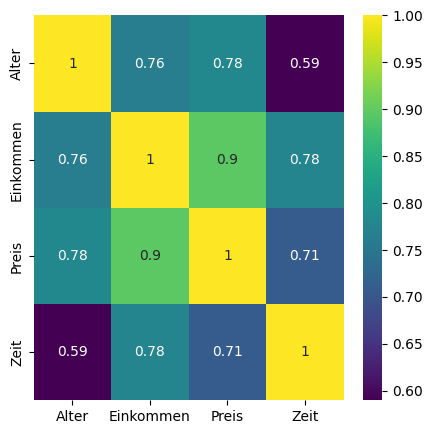

In [11]:
plt.figure(figsize= (5,5))

sns.heatmap(
    df_corr_variables.corr(), #Korellationskoeffizienten berechnen und als Daten für Heatmap verwenden
    cmap = "viridis",
    annot = True
)



# 12. Wie ist die variable Zeit verteilt? (Kunden und Besucher)

In [12]:
df_zeit = df[["Zeit"]]
df_zeit

,Zeit
0,43.0
1,40.0
2,37.0
3,42.0
4,41.0
...,...
1990,48.0
1991,34.0
1992,23.0
1993,32.0


Es bietet sich die Darstellung der Häufigkeit der gemessenen Test-Minuten der Besucher in einem Histogram an, um die Verteilung dieser Variablen zu erkennen.

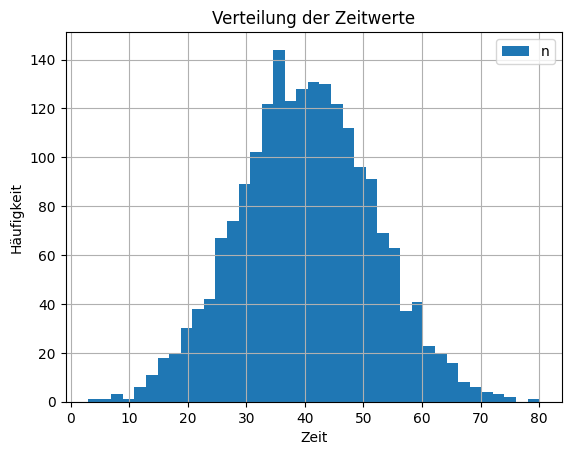

In [22]:
df['Zeit'].hist(bins=39)
plt.xlabel('Zeit')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Zeitwerte')
plt.show()

Die Verteilung der Zeit ist approximativ normalverteilt (n > 30)

# 14. Welches sind die sozioökonomischen Merkmale der Kunden, die den Kaufpreis beeinflussen? Wählen Sie die geeigneten abhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode.

Sozioökonomische Merkmale der Kunden, die den Kaufpreis beeinflussen sind : Einkommen, Alter und Geschlecht

In [14]:
df_kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1.0,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1.0,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1.0,36.0,K1096,Baden-Württemberg


In [15]:
model1 = smf.ols("Preis ~ Alter + Einkommen + Geschlecht" , data = df_kunden).fit()
Stargazer([model1])

# 15. Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit einem Einkommen von 54.000 Euro.

Parameter der Regression in Variablen speichern, um dann Prognosen zu berechnen. 

In [16]:
koeffizienten = model1.params
koeffizienten

Intercept      896.782910
Alter          479.926531
Einkommen        1.061612
Geschlecht    2144.309680
dtype: float64

In [17]:
intercept = koeffizienten["Intercept"]
koeff_alter = koeffizienten["Alter"]
koeff_einkommen = koeffizienten["Einkommen"]
koeff_geschlecht = koeffizienten["Geschlecht"]

In [18]:
kaupfreis1 = (intercept + 32 * koeff_alter + 1 * koeff_geschlecht + 30000 * koeff_einkommen).round(2)
kaupfreis1

50247.09

In [19]:
kaufpreis2 = (intercept + 51 * koeff_alter + 1 * koeff_geschlecht + 54000 * koeff_einkommen).round(2)
kaufpreis2

84844.38

# 16. In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am meisten? Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müssen direkt vergleichbar sein. Wie sollen die Daten transformiert werden? Tipp: Beta-Werte.

Um die Stärke des Einflusses der unabhängigen Variable auf die abhängige Variable zu vergleichen, müssen wir alle Variablen von Interesse standardisieren, um sie auf eine gemeinsame Skala zu transformieren, die Vergleiche zulässig macht. 

- standardisierte Regressionskoeffizienten nennt man Beta-Koeffizienten oder Beta-Werte
- da bspw. Euro und Alter in Jahren unterschiedliche Größenordnungen sind kann man sie schwer vergleichen
- durch Standardisierung wird jede Variable in Einheiten der Standardabweichung ausgedrückt 

$ \text{Standardisierte Variable} = \frac{\text{Variable} - \text{Mittelwert der Variable}}{\text{Standardabweichung der Variable}} $



In [20]:
df_standardisiert = df_kunden.copy()
variablen_standardisieren = ["Alter" , "Einkommen" , "Geschlecht", "Preis"]

df_standardisiert[variablen_standardisieren] = (df_kunden[variablen_standardisieren] - df_kunden[variablen_standardisieren].mean()) / df_kunden[variablen_standardisieren].std()

df_standardisiert

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,1.139273,0.484295,-0.033310,0.750486,43.0,K0310,Bayern
1,0.302664,1.135436,0.579237,0.750486,40.0,K1042,Berlin
2,0.386325,-0.881767,-0.343771,-1.331264,37.0,K0382,Baden-Württemberg
3,-0.115640,0.507131,-0.205416,-1.331264,42.0,K0498,Bayern
4,-0.366623,-0.549170,0.196467,-1.331264,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,1.641239,0.647050,0.604003,0.750486,51.0,K0467,Thüringen
1100,-1.035910,-0.641905,-1.011452,0.750486,33.0,K0122,Niedersachsen
1101,1.390256,0.281564,0.578333,0.750486,41.0,K1045,Berlin
1102,-1.119571,-1.587724,-1.625213,0.750486,36.0,K1096,Baden-Württemberg


neues Modell mit standardisierten Parametern schätzen 

In [21]:
model_standardisiert = smf.ols("Preis ~ Alter + Einkommen + Geschlecht", data = df_standardisiert).fit()

model_standardisiert.params.round(4)

Intercept    -0.0000
Alter         0.2345
Einkommen     0.7164
Geschlecht    0.0421
dtype: float64

Das Einkommen hat den größten Einfluss auf den Kaufpreis. Steigt das Einkommen um eine Standardabweichung, steigt der Kaufpreis durchschnittlich um 0.7164 Standardabweichungen. 